In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
df = pd.read_csv('../Data/ts_s.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Value
Date,
2020-01-31,3.528105
2020-02-29,5.850314
2020-03-31,10.717730
2020-04-30,14.631786
2020-05-31,12.595370


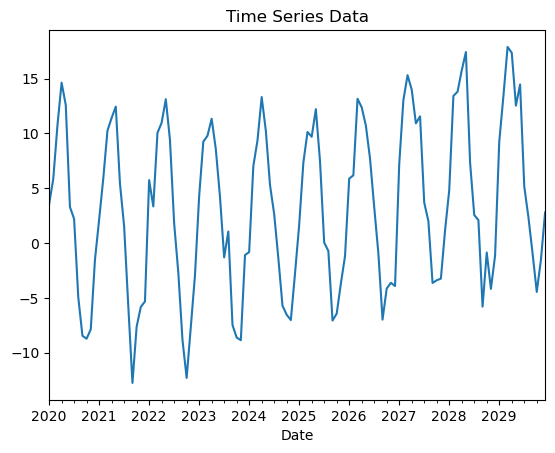

In [7]:
y=df['Value']
y.plot(title='Time Series Data')
plt.show()

In [8]:
#ADF Test for Stationarity 
adf_result = adfuller(y)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
#y = np.diff(y)
adf_result = adfuller(y)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: 1.6260704752542723
p-value: 0.9979337197685336
ADF Statistic: 1.6260704752542723
p-value: 0.9979337197685336


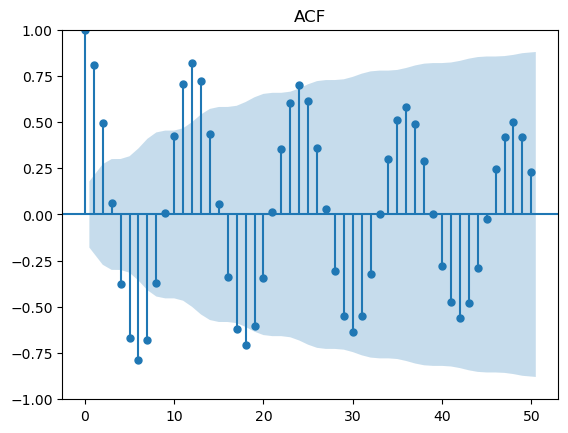

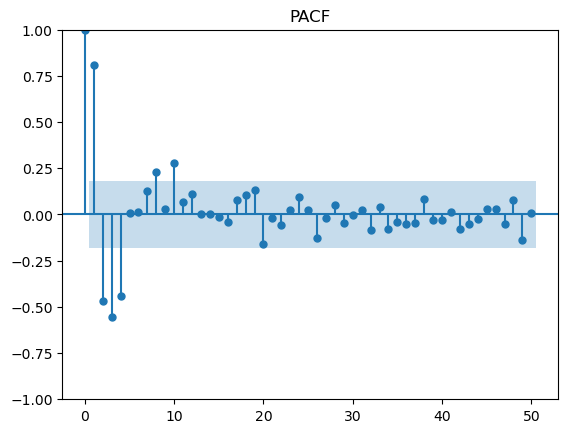

In [13]:
plot_acf(y, lags=50)
plt.title('ACF')
plt.show()
plot_pacf(y, lags=50)
plt.title('PACF')
plt.show()

In [15]:
#AR model
model = AutoReg(y, lags=1)
result = model.fit()
print(result.summary())
yhat = result.fittedvalues
e = result.resid

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  120
Model:                     AutoReg(1)   Log Likelihood                -347.164
Method:               Conditional MLE   S.D. of innovations              4.475
Date:                Mon, 09 Sep 2024   AIC                            700.327
Time:                        13:19:45   BIC                            708.665
Sample:                    02-29-2020   HQIC                           703.713
                         - 12-31-2029                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6084      0.446      1.365      0.172      -0.265       1.482
Value.L1       0.8106      0.054     15.097      0.000       0.705       0.916
                                    Roots           

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [17]:
#AR model

lags = list(range(1,10))

for i in lags:
    model = AutoReg(y, lags=i)
    result = model.fit()
    print(result.aic)

700.3271668154758
668.141710019241
618.8087307016264
584.449312898051
582.4594419452627
573.2257165027537
566.737881891068
551.2269960119926
547.4696711689304


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

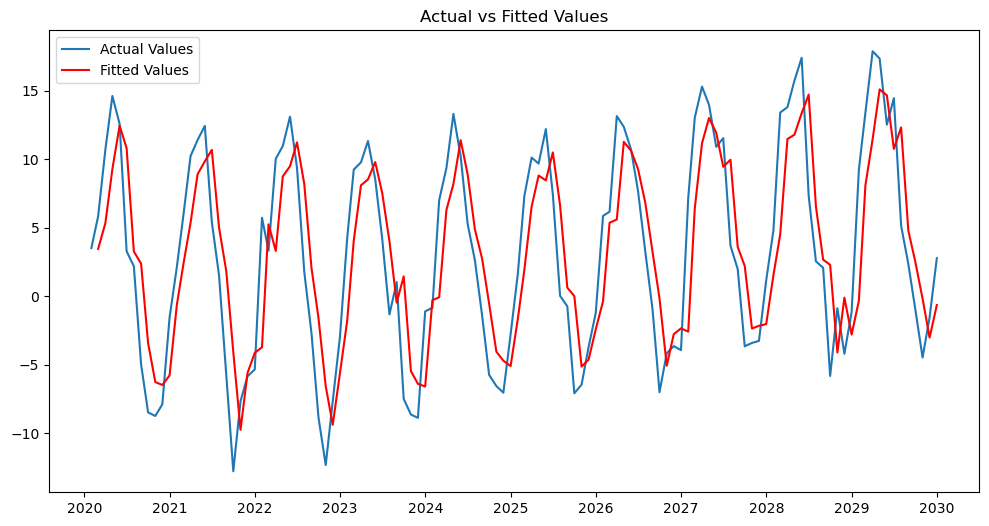

In [19]:
#Fitted vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Values')
plt.plot(yhat, label='Fitted Values', color='red')
plt.title('Actual vs Fitted Values')
plt.legend()
plt.show()

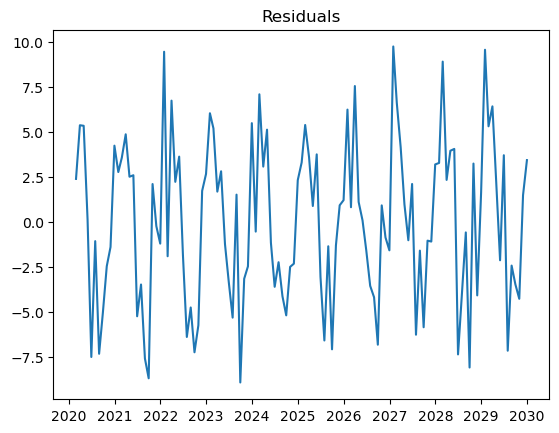

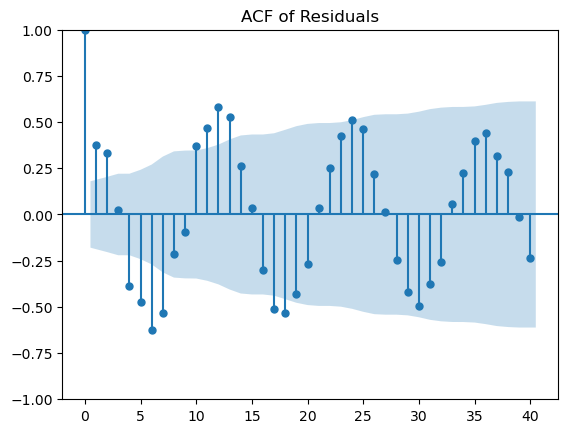

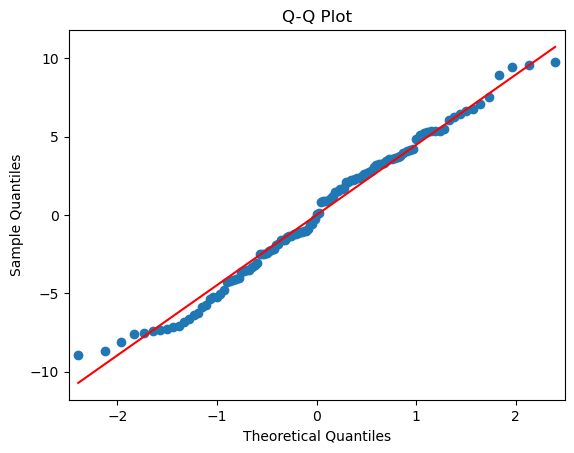

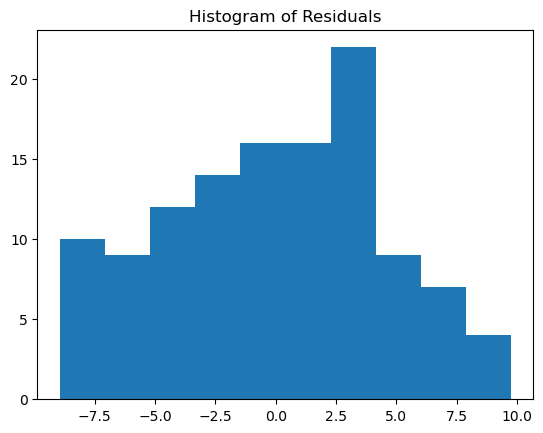

In [21]:
#Residual Plots
plt.plot(e)
plt.title('Residuals')
plt.show()

plot_acf(e, lags=40)
plt.title('ACF of Residuals')
plt.show()

sm.qqplot(e, line='s')
plt.title('Q-Q Plot')
plt.show()

plt.hist(e)
plt.title('Histogram of Residuals')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

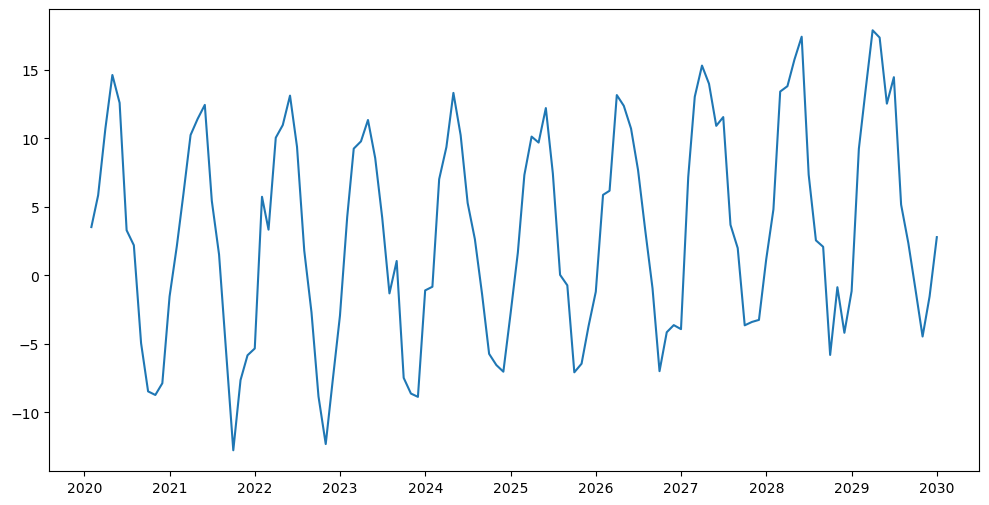

In [23]:
#Forecasting
forecast_steps = 100  
forecast = result.predict(start=len(y), end=len(y) + forecast_steps - 1)

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(y, label='Original Series')
plt.plot(pd.date_range(start=y.index[-1], periods=forecast_steps + 1, closed='right'), forecast, color='red', label='Forecast')
plt.title('Forecast')
plt.legend()
plt.show()